**Section 10: The Perceptron and Neural Networks**

Notebook for "Introduction to Data Science and Machine Learning"

version 1.1, June 23 2024


## Required `import`-statements

The data files path:

In [ ]:
dataFilesPath="data/"

`import` statements required for this notebook.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris, load_breast_cancer
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

With the following code we suppress warning that some seaborn code will be deprecated in the future.

In [ ]:
import warnings # To suppress some warnings
 
# Suppress the specific FutureWarning
warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn")


# 1. Introduction 

In this notebook we will look at **Neural Networks**. We will start by the neuron, the **perceptron**, the simple unit neural networks are composed of. A perceptron can be used to classify **linearly separable** data. We will use it to classify `and`. Then we will try to implement the `xor` operator. This is not possible, as xor is not linearly separable.

We will then use a neural network to classify the `xor` operation. The network can be trained with standard parameters, but will become quite complex. Knowing more of the problem details, `xor` can be implemented in a simple network.

After this we will look at the Iris and the Breast cancer data set. We will specifically:
* see how to split data in "normal" and in stratified folds and observe the difference
* split the data in trainings and test data
* output the confustion matrix and accuracy
* use normalization and observe the difference
* use a pipeline and cross fold validation
* test different network architectures using GridSearchCV


# 2. The Perceptron

## 2.1 and

We start by defining a data frame for the `and` operator.

| `x` |  `y` |  `x and y` |
|---|----|----|
|`False`| `False`| `False`|
|`False`| `True`| `False`|
|`True`| `False`| `False`|
|`True`| `True`| `True`|


As the perceptron works with numerical input and output we replace `False`  by 0 and `True` by 1.

In [ ]:
andData=np.array([[0,0,0],[0,1,0],[1,0,0],[1,1,1]])
andFrame=pd.DataFrame(andData,columns=['x','y','and'])

And we plot it. To better see the points, we enlarge the displayed axis segments:

In [ ]:
cols=andFrame.columns
plt.Figure()
sns.scatterplot(data=andFrame, x=cols[0], y=cols[1],hue=cols[2])
plt.xlim((-.5,1.5))
plt.ylim((-.5,1.5))
plt.title('and')

Now we create the $X$ matrix (the features / samples) and the $y$ array with the labels:

In [ ]:
X=andFrame.copy()
y=X.pop('and')

We create an instance of the Perceptron and learn the classifier:

In [ ]:
perc=Perceptron(random_state=10)
perc.fit(X,y)
print("Weights:",perc.coef_)
print("Intercept:",perc.intercept_)
print("unique class labels:",perc.classes_)

ypred=perc.predict(X)
print(ypred)
print('Accuracy:',perc.score(X,y))

As the function is linearly separable, the result is correct and learned quite fast:

## 2.2 XOR

Now we generate an `xor` data frame.

| `x` |  `y` |  `x xor y` |
|---|----|----|
|`False`| `False`| `False`|
|`False`| `True`| `True`|
|`True`| `False`| `True`|
|`True`| `True`| `False`|

In [ ]:
xorData=np.array([[0,0,0],[0,1,1],[1,0,1],[1,1,0]])
xorFrame=pd.DataFrame(xorData,columns=['x','y','xor'])

And plot it as before

In [ ]:
cols=xorFrame.columns
plt.Figure()
sns.scatterplot(data=xorFrame, x=cols[0], y=cols[1],hue=cols[2])
plt.xlim((-.5,1.5))
plt.ylim((-.5,1.5))
plt.title('xor')

We can easily see that the data is not linearly separable. We try to learn the function by training the perceptron:

In [ ]:
X=xorFrame.copy()
y=X.pop('xor')

perc=Perceptron(random_state=10)
perc.fit(X,y)
print("Weights:",perc.coef_)
print("Intercept:",perc.intercept_)
print("unique class labels:",perc.classes_)

ypred=perc.predict(X)
print(ypred)
print('Accuracy:',perc.score(X,y))

The function was not learned. In fact, `xor` cannot be learned by a simple perceptron as this function is not linearly separable. 

# 3. A Neural Network for `xor`

We now use a neural network to learn a classifier for `xor`. 

We instantiate a classifier and use it with standard parameter values. `MLPClassifier` stands for "Multi-layer Perceptron classifier".

In [ ]:
nn=MLPClassifier(random_state=10)
nn.fit(X,y)
print("number of iterations:",nn.n_iter_)
print("number of weight updates:",nn.t_)

ypred=nn.predict(X)
print(ypred)

There is a warning, that convergion has not yet been reached. The standard number of iterations is 200. We can add more iterations for the training. 

In [ ]:
nn=MLPClassifier(max_iter=300,random_state=10)
nn.fit(X,y)
print("number of iterations:",nn.n_iter_)
print("number of weight updates:",nn.t_)

ypred=nn.predict(X)
print(ypred)

Test  different values for `max_iter` and try to get rid of the warning.

In [ ]:
# Your Code

The trained network has the standard architecture which consists of one hidden layer with 100 nodes. 

In [ ]:
print(nn.hidden_layer_sizes)

A neural network for `xor` can be built with one hidden layer with 2 nodes only, i.e. a much smaller network.

Let's test this:

In [ ]:
nn=MLPClassifier(hidden_layer_sizes=(2,),random_state=10)
nn.fit(X,y)
print("number of iterations:",nn.n_iter_)
print("number of weight updates:",nn.t_)

ypred=nn.predict(X)
print(ypred)


`xor` was not corretly learned. The weights are not yet stable.

Let's try some more iterations:

In [ ]:
nn=MLPClassifier(hidden_layer_sizes=(2,),random_state=10,max_iter=1000)
nn.fit(X,y)
print("number of iterations:",nn.n_iter_)
print("number of weight updates:",nn.t_)

ypred=nn.predict(X)
print(ypred)

And again its not stable, so let's try more.

In [ ]:
nn=MLPClassifier(hidden_layer_sizes=(2,),random_state=10,max_iter=4000)
nn.fit(X,y)
print("number of iterations:",nn.n_iter_)
print("number of weight updates:",nn.t_)

ypred=nn.predict(X)
print(ypred)

The training was finished but `xor` was not learned correctly. 

We know that `xor` can be classified using a neural network with the given architecture. So let's modify other parameters: 
- the activation function as well as the 
- solver algorithm.

In [ ]:
nn=MLPClassifier(hidden_layer_sizes=(2,),random_state=10,activation='tanh',solver='lbfgs')
nn.fit(X,y)
print("number of iterations:",nn.n_iter_)
print("number of weight updates:",nn.t_)
print("coefficients:",nn.coefs_)
print("intercepts:",nn.intercepts_)
ypred=nn.predict(X)
print(ypred)
print('Accuracy:',nn.score(X,y))

In [ ]:
nn=MLPClassifier(hidden_layer_sizes=(2,),random_state=10,activation='tanh',solver='lbfgs')
nn.fit(X,y)
print("number of iterations:",nn.n_iter_)
print("number of weight updates:",nn.t_)
ypred=nn.predict(X)
print(ypred)
print('Accuracy:',nn.score(X,y))

The network was correctly trained in 40 iterations. 

The following depicts the general network structure:

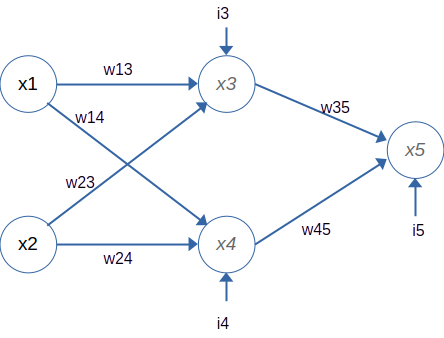

The network was correctly trained in 40 iterations. 

We can print the coefficients and coordinates of the network:

In [ ]:
print("coefficients:",nn.coefs_)
print("intercepts:",nn.intercepts_)

Please note that the values are printed as follows (the names refer to above figure):

**Exercise:** 

Please sketch the network  **on a sheet of paper**. Assign the weights and intercepts to the sketch. 

Please note that the activation function is `tanh` which you can call as `np.tanh()` `tanh()` has values between -1 and 1. Please assign a value of -1 the output of 0, and of 1 the output of 1.

Test the neural network by classiying the input `(1,0)` and `(1,1)` 

# 4. The Iris Dataset

## 4.1 A Neural Network

Now we train a neural network for the iris flower data set.

First we load the data:

In [ ]:
irisDS=load_iris()

In order to create a nice scatter plot using `pairplot()` from the `seaborn` module, the data must be available in form of a pandas data frame. Therefore we create a data frame from the iris data set:

In [ ]:
irisDF=pd.DataFrame(data=irisDS.data,columns=irisDS.feature_names)
irisDF["class"]=irisDS.target

And create and save the scatter plot:

In [ ]:
sns.pairplot(irisDF,hue='class')
plt.savefig('irisScatter.png',dpi=600)


Now let's train the network with standard parameters:

In [ ]:
X=irisDS.data
y=irisDS.target

nn=MLPClassifier(random_state=10)
nn.fit(X,y)
print("number of iterations:",nn.n_iter_)
print("number of weight updates:",nn.t_)

The network did not reach a stable state, so we increase the number of iterations:

In [ ]:
nn=MLPClassifier(random_state=10,max_iter=1000)
nn.fit(X,y)
print("number of iterations:",nn.n_iter_)
print("number of weight updates:",nn.t_)

And let's take a look at the accuracy:

In [ ]:
print('accuracy:',nn.score(X,y))

We calculated the accuracy value for the trainings data. This is of course not the best idea, as we aim to learn the classification of formerly unknown data.  

## 4.2 Splitting trainings and test data

Therefore, we split trainings and test data: 

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=10)

And repeat the training and look at the output:

In [ ]:
nn=MLPClassifier(random_state=10,max_iter=1000)
nn.fit(X_train,y_train)
print("number of iterations:",nn.n_iter_)
print("number of weight updates:",nn.t_)
print('accuracy:',nn.score(X_test,y_test))

As discussed in the lecture it might be important to "stratify" the sets, i.e. to make sure that the class disctribution of classes in the trainigs and test sets correspond to the class distribution of the original data set.

We create stratified sets by using the additional parameter `stratify`. 

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=10,stratify=y)
nn.fit(X_train,y_train)
print("number of iterations:",nn.n_iter_)
print("number of weight updates:",nn.t_)
print('accuracy:',nn.score(X_test,y_test))

Depending on the seed for the random number, this might lead to different results. Please note that the splitting is randomized, Therefore, the results might be better or worse.

Next to the accuracy we can calculate and print the confusion matrix:

In [ ]:
ypred=nn.predict(X_test)
cm=confusion_matrix(y_test,ypred)
print(cm)

And equally create a colorful display:

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=irisDS.target_names)
disp.plot()

# 5. The Breast Cancer Data Set

## 5.1 Training a Neural Network

We load the data set:

In [ ]:
ds=load_breast_cancer()
X=ds.data
y=ds.target

The data set has a class attribute with two values, benign and malign.

We split the data in stratified trainings and test data, create a neural network with standard parameters, train it and output the result:

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=10)

nn=MLPClassifier(random_state=10)
nn.fit(X_train,y_train)

ypred=nn.predict(X_test)
print('accuracy:',nn.score(X_test,y_test)) 
cm=confusion_matrix(y_test,ypred)
print(cm)

Now we repeat the process using stratified trainings and test sets:

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=10,stratify=y)

nn=MLPClassifier(random_state=10)
nn.fit(X_train,y_train)

ypred=nn.predict(X_test)
print('accuracy:',nn.score(X_test,y_test)) 
cm=confusion_matrix(y_test,ypred)
print(cm)

Here the model did not yet converge, we increase the number of iterations: 

In [ ]:
nn=MLPClassifier(random_state=10,max_iter=500)
nn.fit(X_train,y_train)

ypred=nn.predict(X_test)
print('accuracy:',nn.score(X_test,y_test)) 
cm=confusion_matrix(y_test,ypred)
print(cm)

We see that the accuracy was improved. 

Remember: The accuracy depends on the splits as trainings and test data are split randomly! In the next example we simply modified the split. The accuracy is changed.

In [ ]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.33, random_state=12, stratify=y)
nn=MLPClassifier(random_state=10,max_iter=1000)
nn.fit(X_train2,y_train2)

ypred2=nn.predict(X_test2)
print('accuracy:',nn.score(X_test2,y_test2)) 
cm=confusion_matrix(y_test2,ypred2)
print(cm)

Now we will display min and max values of all the features using a loop in tabular form:

In [ ]:
for i in range(X.shape[1]):
    print('{:25}: minimum: {:8.3f} maximum: {:9.3f}'.format(ds.feature_names[i],X[:,i].min(),X[:,i].max()))

We observe that the dimensions of the range of the features is quite different. 

## 5.2 Scaling the data

As neural networks are sensitive to these differences, we **scale** the data using a z-score normalization:

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=10,stratify=y)

theScaler=StandardScaler()
theScaler.fit(X_train)
X_trainScaled=theScaler.transform(X_train)


Wer will use the same scaler on the test data:

In [ ]:
X_testScaled=theScaler.transform(X_test)

Train the neural network with the trainings data, test it with the test data and output the result (accuracy and confusion matrix).

In [ ]:
# Your code

And we see that the accuracy has improved.

## 5.3 Cross Validation

But we can still not make any valid conclusion about the accuracy, as we base on one split only. 

Please us a pipeline and cross validation and determine the results. Use the complete data set for this task.

So we use a pipeline and cross validation and compare the results for the scaled and non scaled data. 

## 5.4 Hyper Parameter Training: The Networt Architecture

Use `GridSearchCV` to test the following network architectures: `[(100,),(50,),(20,),(50,20),(50,20,5)]`
and display the results.



In [ ]:
# Your Code

Which has the best results? Is the difference significant? What architecture would you choose?

**Your answer:**

# 6. Exercise

Load the penguiun data set and create a classifier for the `species` attribute.

In [ ]:
import seaborn as sns

penguins=sns.load_dataset('penguins')



*End of the Notebook*

<a rel="license" href="http://creativecommons.org/licenses/by-nc-nd/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-nd/4.0/88x31.png" /></a><br />This notebook was created by Christina B. Class for teaching at EAH Jena and is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc-nd/4.0/">Creative Commons Attribution-NonCommercial-NoDerivatives 4.0 International License</a>.
